In [2]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [4]:
Eruptions = pd.read_csv('all_files.csv')
Eruptions.head(20)

,time,Unnamed: 1,Unnamed: 2,latitude,longitude,depth,mag,magType,nst,gap,...,VEI,Lat_Eruption,Lon_Eruption,Lat_Dif,Lon_dif,distance_km,Date_Dif,Deaths,Injuries,Damage (Mil)
0,2002-08-19T15:03:23.600Z,8/19/2002,T15:03:23.600Z,37.697,14.967,5.0,2.8,md,9.0,NaN,...,3,37.734,15.004,0.037,0.037,5.246,9,0,32,0
1,2002-08-19T14:57:59.700Z,8/19/2002,T14:57:59.700Z,37.721,14.963,5.0,2.7,md,8.0,NaN,...,3,37.734,15.004,0.013,0.041,3.885,9,0,32,0
2,2002-08-19T12:05:21.700Z,8/19/2002,T12:05:21.700Z,37.708,14.965,5.0,2.8,md,10.0,NaN,...,3,37.734,15.004,0.026,0.039,4.486,9,0,32,0
3,2002-08-13T05:29:43.300Z,8/13/2002,T05:29:43.300Z,37.842,14.667,5.0,3.2,md,18.0,NaN,...,3,37.734,15.004,0.108,0.337,31.956,15,0,32,0
4,2002-08-13T02:35:50.000Z,8/13/2002,T02:35:50.000Z,37.840,14.662,5.0,2.5,md,5.0,NaN,...,3,37.734,15.004,0.106,0.342,32.282,15,0,32,0
5,2002-08-13T02:30:20.600Z,8/13/2002,T02:30:20.600Z,37.829,14.656,5.0,3.4,md,24.0,NaN,...,3,37.734,15.004,0.095,0.348,32.356,15,0,32,0
6,2002-08-13T00:03:35.200Z,8/13/2002,T00:03:35.200Z,37.808,14.632,2.9,2.5,md,7.0,NaN,...,3,37.734,15.004,0.074,0.372,33.717,15,0,32,0
7,2002-07-29T01:54:17.100Z,7/29/2002,T01:54:17.100Z,38.136,15.159,22.4,2.6,md,4.0,NaN,...,3,37.734,15.004,0.402,0.155,46.722,30,0,32,0
8,2002-07-09T23:15:36.700Z,7/9/2002,T23:15:36.700Z,37.571,15.196,5.0,2.8,md,7.0,NaN,...,3,37.734,15.004,0.163,0.192,24.783,50,0,32,0
9,2002-07-09T04:46:07.800Z,7/9/2002,T04:46:07.800Z,37.598,15.055,5.0,3.0,md,12.0,NaN,...,3,37.734,15.004,0.136,0.051,15.775,50,0,32,0


## Data Pre-Processing

In [5]:
Eruptions.dtypes

time                object
Unnamed: 1          object
Unnamed: 2          object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
Name                object
Year                 int64
Month                int64
Day                  int64
Eruption_Date       object
VEI                  int64
Lat_Eruption       float64
Lon_Eruption       float64
Lat_Dif            float64
Lon_dif            float64
distance_km        float64
Date_Dif             int64
Deaths               int64
I

In [6]:
selected_features = Eruptions[['depth','mag','distance_km','Date_Dif','VEI']]
selected_features.head(10)

,depth,mag,distance_km,Date_Dif,VEI
0,5.0,2.8,5.246,9,3
1,5.0,2.7,3.885,9,3
2,5.0,2.8,4.486,9,3
3,5.0,3.2,31.956,15,3
4,5.0,2.5,32.282,15,3
5,5.0,3.4,32.356,15,3
6,2.9,2.5,33.717,15,3
7,22.4,2.6,46.722,30,3
8,5.0,2.8,24.783,50,3
9,5.0,3.0,15.775,50,3


In [7]:
#X = selected_features.drop("VEI", axis=1)
X = selected_features[["mag","depth","distance_km","Date_Dif"]]
y = selected_features["VEI"]
print(X.shape, y.shape)

(1458, 4) (1458,)


In [8]:
X.head(20)

,mag,depth,distance_km,Date_Dif
0,2.8,5.0,5.246,9
1,2.7,5.0,3.885,9
2,2.8,5.0,4.486,9
3,3.2,5.0,31.956,15
4,2.5,5.0,32.282,15
5,3.4,5.0,32.356,15
6,2.5,2.9,33.717,15
7,2.6,22.4,46.722,30
8,2.8,5.0,24.783,50
9,3.0,5.0,15.775,50


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4339075392091948
Testing Score: 0.4796525182263175


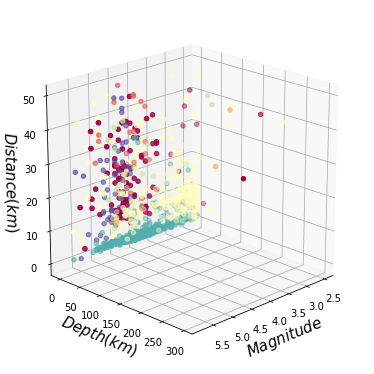

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.set_xlabel('$Magnitude$', fontsize=15, rotation=150)
axes.set_ylabel('$Depth (km)$', fontsize=15)
axes.set_zlabel(r'$Distance (km)$', fontsize=15, rotation=60)
axes.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

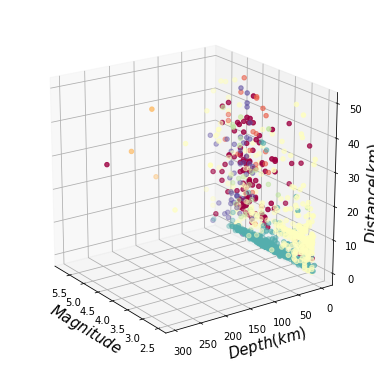

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=145)
axes.set_xlabel('$Magnitude$', fontsize=15, rotation=150)
axes.set_ylabel('$Depth (km)$', fontsize=15)
axes.set_zlabel(r'$Distance (km)$', fontsize=15, rotation=60)
axes.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

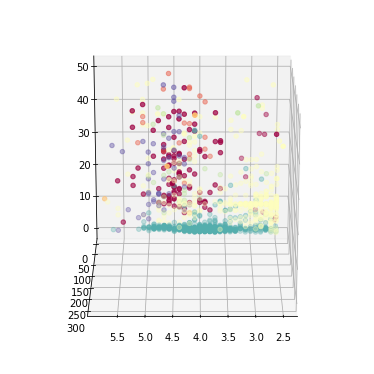

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=90)
axes.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

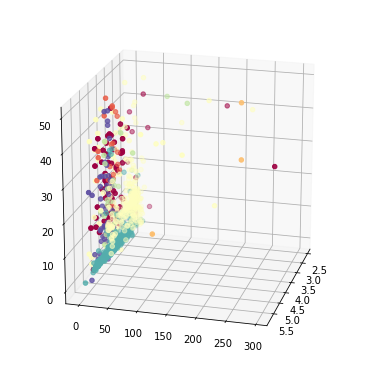

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=15)
axes.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.44653546298497204


Text(0.5, 1.0, 'Residual Plot')

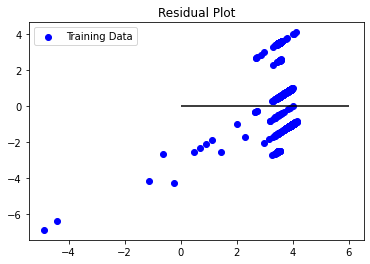

In [15]:
 # Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
#plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

Text(0.5, 1.0, 'Residual Plot')

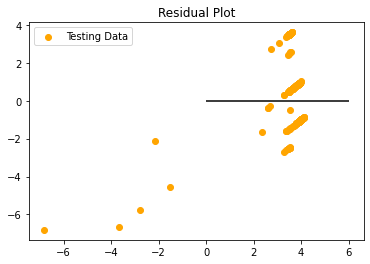

In [16]:
### BEGIN SOLUTION
#plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [17]:

# define base model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [18]:
from sklearn.datasets import make_regression

n_features = 6
X, y = make_regression(n_samples=1458, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(1458, 6)


In [19]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=6))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [24]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 11,002
Trainable params: 11,002
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60


ValueError: in user code:

    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\billt\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 6 but received input with shape (None, 2)


## Quantify our Trained Model

In [16]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

792/1 - 0s - loss: 0.0328 - accuracy: 0.9798
Normal Neural Network - Loss: 0.05984371190777782, Accuracy: 0.9797979593276978


## Make Predictions

In [17]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [18]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['female' 'female' 'female' 'female' 'female']
Actual Labels: ['female', 'female', 'female', 'female', 'female']
